# Labb 2

## Functions

In [271]:
import math
import matplotlib.pyplot as plt

# matches the test data to the closest data point and determines type
def check_data(cases, pichu_data, pikachu_data):
    for case in cases:
        # set closest dot and pokemon
        distance = 100000
        pokemon = ""
        

        #loop in pichu_data and pikachu_data 
        for pichu, pikachu in zip(pichu_data,pikachu_data):
            # calculates the distance between pichu/pikachu and the new data
            pichu_distance = math.sqrt((case[0]-pichu[0])**2 + (case[1]-pichu[1])**2)
            pikachu_distace = math.sqrt((case[0]-pikachu[0])**2 + (case[1]-pikachu[1])**2)
        
            # checks if pichu is closer to test than pikachu and previus closest
            if pichu_distance < pikachu_distace and pichu_distance < distance:
                distance = pichu_distance
                pokemon = "Pichu"
            # checks if pikachu is closer to test than pichu and previus closest
            elif pikachu_distace < pichu_distance and pikachu_distace < distance:
                distance = pikachu_distace
                pokemon = "pikachu"
            
        print(f"{pokemon=} with distance to closest point being {distance}")

# same as check_data but uses the 10 closest points to determine type
def improved_check_data(cases, pichu_data, pikachu_data):
    return_lst = []
    for case in cases:
        # set closest dot and pokemon
        pokemon_lst = []
        pichu_counter = 0
        pikachu_counter = 0

        # calculates the distans between test point and every pichupoint then adds it to a list
        for pichu in pichu_data:
            pichu_distance = math.sqrt((case[0]-pichu[0])**2 + (case[1]-pichu[1])**2)
            pokemon_lst.append([pichu_distance, "pichu"])

        # calculates the distans between test point and every pichupoint then adds it to a list
        for pikachu in pikachu_data:
            pikachu_distace = math.sqrt((case[0]-pikachu[0])**2 + (case[1]-pikachu[1])**2)
            pokemon_lst.append([pikachu_distace, "pikachu"])
        
        # sorts the list and removes everything from it but the 10 closest points
        pokemon_lst.sort()
        del pokemon_lst[10:]
        for pokemon in pokemon_lst:
            if pokemon[1] == "pichu":
                pichu_counter += 1
            elif pokemon[1] == "pikachu":
                pikachu_counter += 1
        
        # checks if there are more pichus or pikachus among the 10 closest points
        if pichu_counter > pikachu_counter:
            #print("it is a pichu")
            return_lst.append("pichu")
        elif pikachu_counter > pichu_counter:
            #print("it is a pikachu")
            return_lst.append("pikachu")
        # since it picks pokemon based on the majority among 10 datapoints there is a chance that it would result in a tie
        # this could be improved by weighted selection where the closest point is worth more than the 10th closest or just use the combined distance to calculate it
        else:
            #print("unclear if pikachu or pichu")
            return_lst.append("unclear")

        #print(pokemon_lst)
    return return_lst

# Plots a scatter graph of all data points
def plot_data(data1 ,data2 ,data3): #note that the order you input data does not matter for graph
    # plots dots for every pichu
    x = [i[0] for i in data1]
    y = [i[1] for i in data1]

    plt.scatter(x, y)

    # plots dots for every pikachu
    x = [i[0] for i in data2]
    y = [i[1] for i in data2]

    plt.scatter(x, y)

    #plots dots for every test point
    x = [i[0] for i in data3]
    y = [i[1] for i in data3]

    plt.scatter(x, y)

    plt.title("Pichu/Pikachu weight and height")
    plt.xlabel("weight")
    plt.ylabel("height")
    plt.grid()
    plt.show()




## Grunduppgift

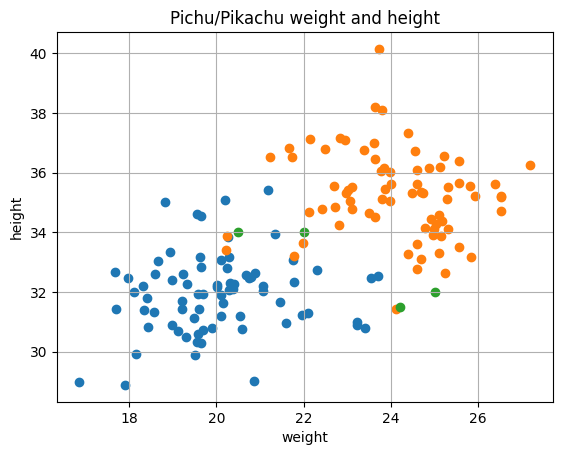

pokemon='pikachu' with distance to closest point being 0.6829635758323602
pokemon='pikachu' with distance to closest point being 0.12078857390630211
pokemon='pikachu' with distance to closest point being 0.3542396645807627
pokemon='Pichu' with distance to closest point being 0.2707605811313157


In [272]:
# opens to read the datapoints from txt
with open("../Data/datapoints.txt", "r") as f_read:
    
    # takes in all datapoints and splits them into lists.
    points = [point.strip("\n") for point in f_read.readlines()]
    sets = [point.split(", ") for point in points]
    # removes and saves the description for what the data in the sets mean
    sets_description = sets.pop(0)
   
    #print(sets[0])

    # sorts data into two lists of pichus and pikachus and removes 0/1 indicating if its pichu or pikachu
    pichu_data = []
    pikachu_data = []
    for set in sets:
        j = [float(set[0]), float(set[1])]
        if set[-1] == "0":
            pichu_data.append(j)
        else:
            pikachu_data.append(j)

# opens to read the test cases from txt
with open("../Data/testpoints.txt", "r") as f_read:

    # takes in all test points and splits them into list
    test_points = [cases.strip("\n").split(". ") for cases in f_read.readlines()]
    test_points.pop(0)
    test_cases = [points[1].strip("( )").split(", ") for points in test_points]
    # converts list items to floats
    for cases in test_cases:
        cases[0] = float(cases[0])
        cases[1] = float(cases[1])


plot_data(pichu_data, pikachu_data, test_cases)
check_data(test_cases, pichu_data, pikachu_data)


## fort. uppgifter

In [273]:

user_test = [input("Input width and height of your pokemon") for _ in range(2)]

try:
    user_test[0] = float(user_test[0])
    user_test[1] = float(user_test[1])
    if user_test[0] < 0 or user_test[1] <0:
        raise ValueError("Negative numbers not allowed")
except ValueError as err:
    print(err)

user_test = [user_test]
print(user_test)
plot_data(pichu_data, pikachu_data, user_test)
check_data(user_test, pichu_data, pikachu_data)
improved_check_data(user_test, pichu_data, pikachu_data)


## Bonus uppgift

average accuracy is 95.8%


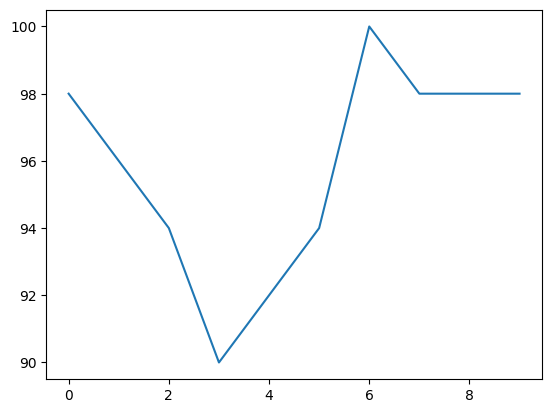

In [274]:
import random as rnd

accuracy = []

for i in range(10):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    pichu_testpoints = []
    pikachu_testpoints = []
    pichu_data_clone = list(pichu_data)
    pikachu_data_clone = list(pikachu_data)

    for _ in range(25):
        pichu_testpoints.append(pichu_data_clone.pop(rnd.randrange(0,len(pichu_data_clone))))
        pikachu_testpoints.append(pikachu_data_clone.pop(rnd.randrange(0,len(pikachu_data_clone))))

    pichu_checker = improved_check_data(pichu_testpoints, pichu_data_clone, pikachu_data_clone)
    pikachu_checker = improved_check_data(pikachu_testpoints, pichu_data_clone, pikachu_data_clone)

    for pichu, pikachu in zip(pichu_checker, pikachu_checker):
        if pichu == "pichu":
            tn += 1
        else:
            fp += 1
        
        if pikachu == "pikachu":
            tp += 1
        else:
            fn += 1

    accuracy.append(((tp+tn)/(tp+tn+fp+fn))*100)

print(f"average accuracy is {(accuracy[0]+accuracy[1]+accuracy[2]+accuracy[3]+accuracy[4]+accuracy[5]+accuracy[6]+accuracy[7]+accuracy[8]+accuracy[9])/10}%")
plt.plot(accuracy)
plt.show()